<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EB%93%B1%EC%B4%8C%EA%B3%A0%EC%A7%84%ED%95%99%EC%84%A4%EB%AA%85%ED%9A%8C_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,947 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

In [1]:
import matplotlib.pyplot as plt

#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

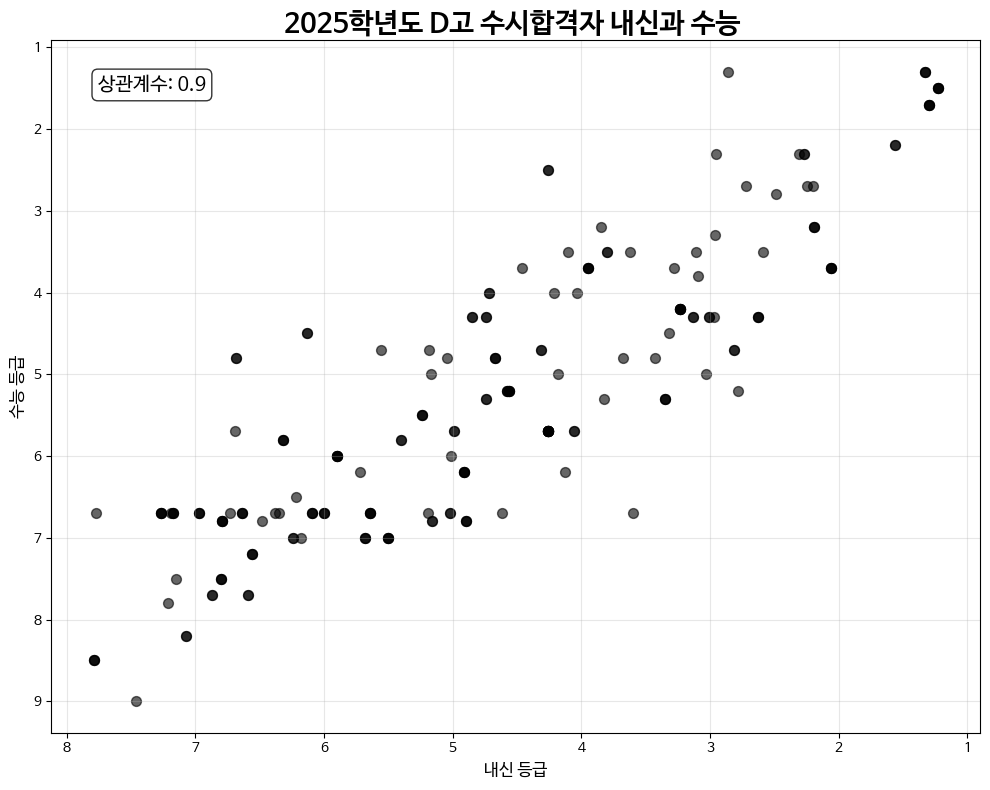

데이터 개수: 209개
상관계수: 0.9
p-value: 0.0


In [2]:
#1. 2025학년도 합격자들이 내신과 수능 산점도

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 데이터 입력
data = [1.23, 1.5, 1.23, 1.5, 1.23, 1.5, 1.23, 1.5, 1.3, 1.7, 1.3, 1.7, 1.3, 1.7, 1.3, 1.7, 1.33, 1.3, 1.33, 1.3, 1.33, 1.3, 1.56, 2.2, 1.56, 2.2, 2.06, 3.7, 2.06, 3.7, 2.06, 3.7, 2.06, 3.7, 2.19, 3.2, 2.19, 3.2, 2.19, 3.2, 2.2, 2.7, 2.25, 2.7, 2.27, 2.3, 2.27, 2.3, 2.31, 2.3, 2.49, 2.8, 2.59, 3.5, 2.63, 4.3, 2.63, 4.3, 2.63, 4.3, 2.72, 2.7, 2.78, 5.2, 2.81, 4.7, 2.81, 4.7, 2.86, 1.3, 2.95, 2.3, 2.96, 3.3, 2.97, 4.3, 3.01, 4.3, 3.01, 4.3, 3.03, 5, 3.09, 3.8, 3.11, 3.5, 3.13, 4.3, 3.13, 4.3, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.28, 3.7, 3.32, 4.5, 3.35, 5.3, 3.35, 5.3, 3.35, 5.3, 3.43, 4.8, 3.6, 6.7, 3.62, 3.5, 3.68, 4.8, 3.8, 3.5, 3.8, 3.5, 3.82, 5.3, 3.85, 3.2, 3.95, 3.7, 3.95, 3.7, 3.95, 3.7, 3.95, 3.7, 4.03, 4, 4.06, 5.7, 4.06, 5.7, 4.1, 3.5, 4.13, 6.2, 4.18, 5, 4.21, 4, 4.26, 2.5, 4.26, 2.5, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.31, 4.7, 4.31, 4.7, 4.46, 3.7, 4.56, 5.2, 4.56, 5.2, 4.56, 5.2, 4.56, 5.2, 4.58, 5.2, 4.58, 5.2, 4.58, 5.2, 4.62, 6.7, 4.67, 4.8, 4.67, 4.8, 4.67, 4.8, 4.72, 4, 4.72, 4, 4.74, 4.3, 4.74, 4.3, 4.74, 5.3, 4.74, 5.3, 4.85, 4.3, 4.85, 4.3, 4.9, 6.8, 4.9, 6.8, 4.9, 6.8, 4.91, 6.2, 4.91, 6.2, 4.91, 6.2, 4.91, 6.2, 4.99, 5.7, 4.99, 5.7, 5.01, 6, 5.02, 6.7, 5.02, 6.7, 5.04, 4.8, 5.16, 6.8, 5.16, 6.8, 5.17, 5, 5.18, 4.7, 5.19, 6.7, 5.24, 5.5, 5.24, 5.5, 5.24, 5.5, 5.4, 5.8, 5.4, 5.8, 5.5, 7, 5.5, 7, 5.5, 7, 5.5, 7, 5.56, 4.7, 5.64, 6.7, 5.64, 6.7, 5.64, 6.7, 5.64, 6.7, 5.68, 7, 5.68, 7, 5.68, 7, 5.72, 6.2, 5.9, 6, 5.9, 6, 5.9, 6, 5.9, 6, 5.9, 6, 6, 6.7, 6, 6.7, 6, 6.7, 6.09, 6.7, 6.09, 6.7, 6.09, 6.7, 6.13, 4.5, 6.13, 4.5, 6.18, 7, 6.22, 6.5, 6.24, 7, 6.24, 7, 6.32, 5.8, 6.32, 5.8, 6.32, 5.8, 6.35, 6.7, 6.38, 6.7, 6.48, 6.8, 6.56, 7.2, 6.56, 7.2, 6.56, 7.2, 6.59, 7.7, 6.59, 7.7, 6.64, 6.7, 6.64, 6.7, 6.64, 6.7, 6.68, 4.8, 6.68, 4.8, 6.69, 5.7, 6.73, 6.7, 6.79, 6.8, 6.79, 6.8, 6.79, 6.8, 6.79, 6.8, 6.8, 7.5, 6.8, 7.5, 6.8, 7.5, 6.87, 7.7, 6.87, 7.7, 6.97, 6.7, 6.97, 6.7, 6.97, 6.7, 7.07, 8.2, 7.07, 8.2, 7.15, 7.5, 7.17, 6.7, 7.17, 6.7, 7.17, 6.7, 7.19, 6.7, 7.21, 7.8, 7.27, 6.7, 7.27, 6.7, 7.27, 6.7, 7.27, 6.7, 7.46, 9, 7.77, 6.7, 7.79, 8.5, 7.79, 8.5, 7.79, 8.5]

# 내신과 수능 데이터 분리 (짝수 인덱스: 내신, 홀수 인덱스: 수능)
내신 = [data[i] for i in range(0, len(data), 2)]
수능 = [data[i] for i in range(1, len(data), 2)]

# 상관계수 계산
correlation, p_value = pearsonr(내신, 수능)


# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.scatter(내신, 수능, alpha=0.6, s=50, color='black')

# 축 역방향 설정 (낮은 등급이 좋은 성적이므로)
plt.gca().invert_xaxis()  # x축 역방향
plt.gca().invert_yaxis()  # y축 역방향


# 축 레이블 및 제목
plt.xlabel('내신 등급', fontsize=12)
plt.ylabel('수능 등급', fontsize=12)
plt.title('2025학년도 D고 수시합격자 내신과 수능 ', fontsize= 20, fontweight='bold')

# 상관계수를 그래프 왼쪽 위에 표시
plt.text(0.05, 0.95, f'상관계수: {correlation:.1f}',
         transform=plt.gca().transAxes,
         fontsize= 14,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top')

# 격자 표시
plt.grid(True, alpha=0.3)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

print(f"데이터 개수: {len(내신)}개")
print(f"상관계수: {correlation:.1f}")
print(f"p-value: {p_value:.1f}")

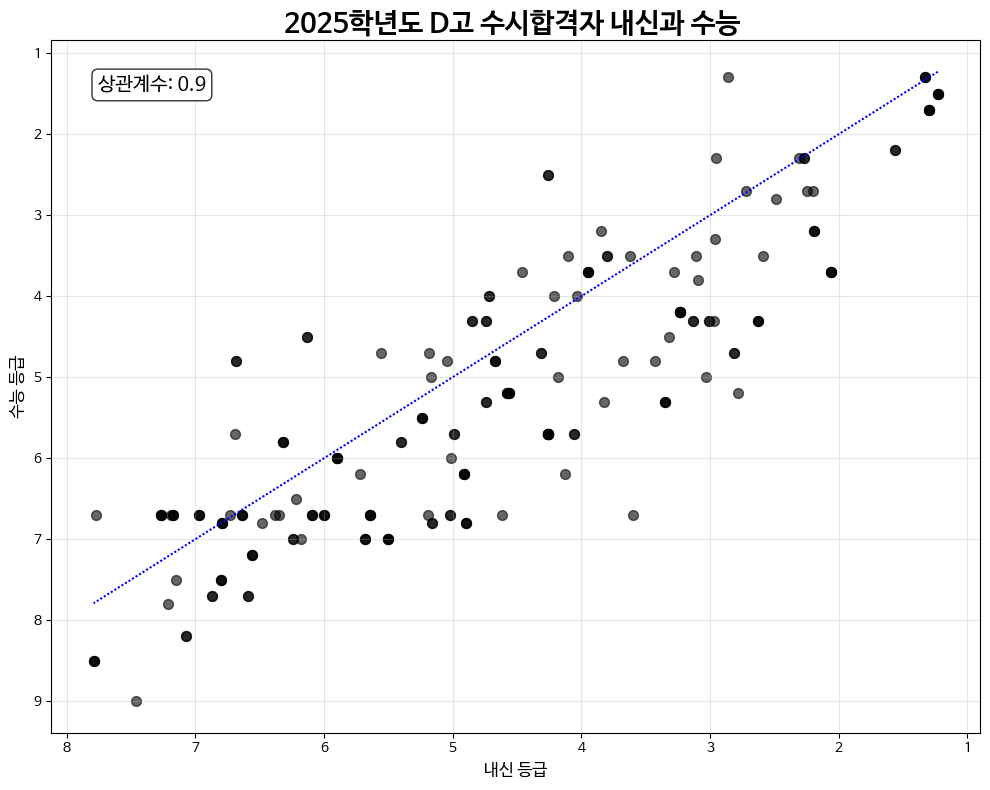

데이터 개수: 209개
상관계수: 0.9
p-value: 0.0


In [3]:
#2. 2025학년도 합격자들이 내신과 수능 1:1 대응직선


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 데이터 입력
data = [1.23, 1.5, 1.23, 1.5, 1.23, 1.5, 1.23, 1.5, 1.3, 1.7, 1.3, 1.7, 1.3, 1.7, 1.3, 1.7, 1.33, 1.3, 1.33, 1.3, 1.33, 1.3, 1.56, 2.2, 1.56, 2.2, 2.06, 3.7, 2.06, 3.7, 2.06, 3.7, 2.06, 3.7, 2.19, 3.2, 2.19, 3.2, 2.19, 3.2, 2.2, 2.7, 2.25, 2.7, 2.27, 2.3, 2.27, 2.3, 2.31, 2.3, 2.49, 2.8, 2.59, 3.5, 2.63, 4.3, 2.63, 4.3, 2.63, 4.3, 2.72, 2.7, 2.78, 5.2, 2.81, 4.7, 2.81, 4.7, 2.86, 1.3, 2.95, 2.3, 2.96, 3.3, 2.97, 4.3, 3.01, 4.3, 3.01, 4.3, 3.03, 5, 3.09, 3.8, 3.11, 3.5, 3.13, 4.3, 3.13, 4.3, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.23, 4.2, 3.28, 3.7, 3.32, 4.5, 3.35, 5.3, 3.35, 5.3, 3.35, 5.3, 3.43, 4.8, 3.6, 6.7, 3.62, 3.5, 3.68, 4.8, 3.8, 3.5, 3.8, 3.5, 3.82, 5.3, 3.85, 3.2, 3.95, 3.7, 3.95, 3.7, 3.95, 3.7, 3.95, 3.7, 4.03, 4, 4.06, 5.7, 4.06, 5.7, 4.1, 3.5, 4.13, 6.2, 4.18, 5, 4.21, 4, 4.26, 2.5, 4.26, 2.5, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.26, 5.7, 4.31, 4.7, 4.31, 4.7, 4.46, 3.7, 4.56, 5.2, 4.56, 5.2, 4.56, 5.2, 4.56, 5.2, 4.58, 5.2, 4.58, 5.2, 4.58, 5.2, 4.62, 6.7, 4.67, 4.8, 4.67, 4.8, 4.67, 4.8, 4.72, 4, 4.72, 4, 4.74, 4.3, 4.74, 4.3, 4.74, 5.3, 4.74, 5.3, 4.85, 4.3, 4.85, 4.3, 4.9, 6.8, 4.9, 6.8, 4.9, 6.8, 4.91, 6.2, 4.91, 6.2, 4.91, 6.2, 4.91, 6.2, 4.99, 5.7, 4.99, 5.7, 5.01, 6, 5.02, 6.7, 5.02, 6.7, 5.04, 4.8, 5.16, 6.8, 5.16, 6.8, 5.17, 5, 5.18, 4.7, 5.19, 6.7, 5.24, 5.5, 5.24, 5.5, 5.24, 5.5, 5.4, 5.8, 5.4, 5.8, 5.5, 7, 5.5, 7, 5.5, 7, 5.5, 7, 5.56, 4.7, 5.64, 6.7, 5.64, 6.7, 5.64, 6.7, 5.64, 6.7, 5.68, 7, 5.68, 7, 5.68, 7, 5.72, 6.2, 5.9, 6, 5.9, 6, 5.9, 6, 5.9, 6, 5.9, 6, 6, 6.7, 6, 6.7, 6, 6.7, 6.09, 6.7, 6.09, 6.7, 6.09, 6.7, 6.13, 4.5, 6.13, 4.5, 6.18, 7, 6.22, 6.5, 6.24, 7, 6.24, 7, 6.32, 5.8, 6.32, 5.8, 6.32, 5.8, 6.35, 6.7, 6.38, 6.7, 6.48, 6.8, 6.56, 7.2, 6.56, 7.2, 6.56, 7.2, 6.59, 7.7, 6.59, 7.7, 6.64, 6.7, 6.64, 6.7, 6.64, 6.7, 6.68, 4.8, 6.68, 4.8, 6.69, 5.7, 6.73, 6.7, 6.79, 6.8, 6.79, 6.8, 6.79, 6.8, 6.79, 6.8, 6.8, 7.5, 6.8, 7.5, 6.8, 7.5, 6.87, 7.7, 6.87, 7.7, 6.97, 6.7, 6.97, 6.7, 6.97, 6.7, 7.07, 8.2, 7.07, 8.2, 7.15, 7.5, 7.17, 6.7, 7.17, 6.7, 7.17, 6.7, 7.19, 6.7, 7.21, 7.8, 7.27, 6.7, 7.27, 6.7, 7.27, 6.7, 7.27, 6.7, 7.46, 9, 7.77, 6.7, 7.79, 8.5, 7.79, 8.5, 7.79, 8.5]

# 내신과 수능 데이터 분리 (짝수 인덱스: 내신, 홀수 인덱스: 수능)
x = [data[i] for i in range(0, len(data), 2)]
y = [data[i] for i in range(1, len(data), 2)]

# 상관계수 계산
correlation, p_value = pearsonr(내신, 수능)




# 그래프 그리기
plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.6, s=50, color='black')

# 축 역방향 설정 (낮은 등급이 좋은 성적이므로)
plt.gca().invert_xaxis()  # x축 역방향
plt.gca().invert_yaxis()  # y축 역방향


# 축 레이블 및 제목
plt.xlabel('내신 등급', fontsize=12)
plt.ylabel('수능 등급', fontsize=12)
plt.title('2025학년도 D고 수시합격자 내신과 수능 ', fontsize= 20, fontweight='bold')

# 상관계수를 그래프 왼쪽 위에 표시
plt.text(0.05, 0.95, f'상관계수: {correlation:.1f}',
         transform=plt.gca().transAxes,
         fontsize= 14,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         verticalalignment='top')


# Add a 1:1 line
plt.plot([min(x), max(x)], [min(x), max(x)], color='blue', linestyle='--', dashes=[1, 1]) # 1:1 대응 직선 추가

# 격자 표시
plt.grid(True, alpha=0.3)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

print(f"데이터 개수: {len(내신)}개")
print(f"상관계수: {correlation:.1f}")
print(f"p-value: {p_value:.1f}")

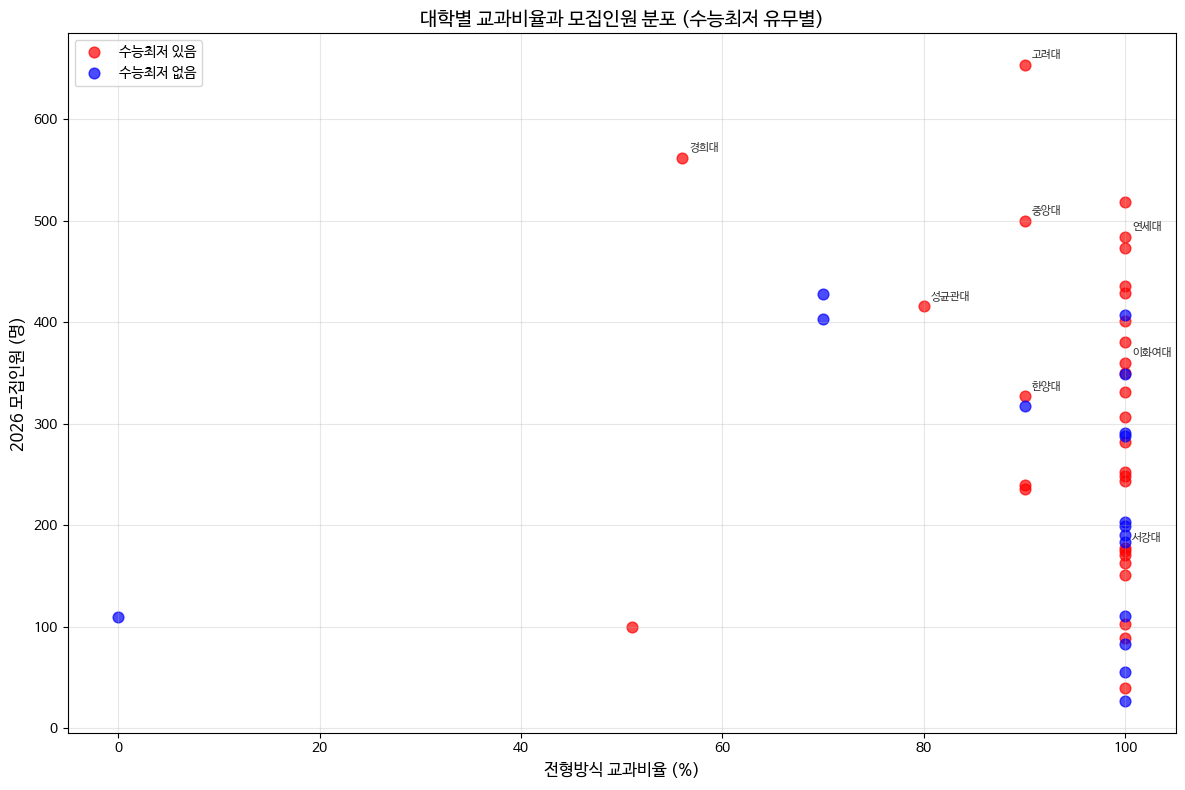

교과비율별 대학 분포:
            학교   교과비율  2026모집인원  수능최저유무
5         경인교대    0.0       110   False
26         수원대   51.0       100    True
6          경희대   56.0       562    True
3          건국대   70.0       428   False
13         동국대   70.0       403   False
23        성균관대   80.0       416    True
7          고려대   90.0       653    True
4          경기대   90.0       317   False
21       서울시립대   90.0       236    True
24        성신여대   90.0       240    True
44         한양대   90.0       327    True
35         중앙대   90.0       500    True
1         가톨릭대  100.0       282    True
8          광운대  100.0       199   False
10         단국대  100.0       252    True
9          국민대  100.0       401    True
15         명지대  100.0       291   False
14        동덕여대  100.0       244    True
12        덕성여대  100.0       175    True
11         대진대  100.0       203   False
19       서울과기대  100.0       473    True
18         서강대  100.0       178    True
16         삼육대  100.0       103    True
17         상명대  100.0      

In [ ]:
#3. 서울주요대 교과전형 산점도

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re



#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



# 데이터 입력
data = {
    '학교': ['가천대', '가톨릭대', '강남대', '건국대', '경기대', '경인교대', '경희대', '고려대', '광운대', '국민대',
             '단국대', '대진대', '덕성여대', '동국대', '동덕여대', '명지대', '삼육대', '상명대', '서강대', '서울과기대',
             '서울교대', '서울시립대', '서울여대', '성균관대', '성신여대', '세종대', '수원대', '숙명여대', '숭실대', '아주대',
             '연세대', '을지대', '이화여대', '인천대', '인하대', '중앙대', '차의과학대', '평택대', '한경국립대', '한국공학대',
             '한국외대', '한국항공대', '한성대', '한신대', '한양대', '한양대(ERICA)', '홍익대'],
    '전형명': ['지역균형', '지역균형', '지역균형', 'KU지역균형', '학교장추천', '학교장추천', '지역균형', '학교추천', '지역균형', '교과성적우수자',
               '지역균형선발', '학교장추천', '고교추천', '학교장추천인재', '학생부교과우수자', '학교장추천', '학교장추천', '고교추천', '지역균형', '고교추천',
               '학교장추천', '지역균형선발', '교과우수자', '학교장추천', '지역균형', '지역균형', '고교추천', '지역균형선발', '학생부우수자', '고교추천',
               '추천형', '지역균형', '고교추천', '지역균형', '지역균형', '지역균형', '지역균형선발', 'PTU추천', '지역균형선발', '지역균형',
               '학교장추천', '학교장추천', '지역균형', '학교장추천', '추천형', '지역균형선발', '학교장추천자'],
    '2026모집인원': [407, 282, 163, 428, 317, 110, 562, 653, 199, 401,
                  252, 203, 175, 403, 244, 291, 103, 349, 178, 473,
                  40, 236, 171, 416, 240, 350, 100, 248, 436, 331,
                  484, 151, 360, 288, 429, 500, 89, 83, 27, 190,
                  380, 111, 183, 55, 327, 518, 307],
    '전형방식': ['1단계(7배수): 교과100\n2단계: 1단계50 + 면접 50', '일반: 교과 100\n간호: 교과 100\n의예: 교과 100 + 인적성면접(합/불)',
                '교과 100', '교과 70 + 서류 30', '교과 90 + 출결 10', '', '교과 56 + 출결 7 + 봉사 7 + 서류 30', '교과 90 + 서류 10',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 100', '교과 70 + 서류 30', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '1단계(2배수): 교과 100\n2단계: 1단계 80 + 면접 20', '교과90 + 서류 10',
                '교과 100', '교과 80 + 서류 20', '교과 90 + 출결 10', '교과 100', '교과 51.7 + 면접 48.3', '교과 100', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 100', '교과90 + 출결 10', '교과 100', '교과 100', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 90 + 서류 10', '교과 100', '교과 100'],
    '수능최저': ['없음', '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5\n간호: 국,수,영,탐(1) 중 3개 합 7\n의예: 국,수,영,과(절사) 4개 합  5등급, 한 4',
                '주간: 국,수,영,탐(1) 중 1개 3\n야간: 없음', '없음', '없음', '없음', '국,수,영,탐 중 2개 합 5, 한 5\n의예, 한의예, 치의예, 약학: 국,수,영,탐 중 3개 합 4, 한 5',
                '국,수,영,탐(1) 중 3개 합 7, 한 4\n의대: 국,수,영,탐(1) 중 4개 합 5, 한 4', '없음', '인문: 국,수,영,탐(1) 중 2개 합 6\n자연: 국,수,영,과(1) 중 2개 합 6',
                '국,수,영,탐(1) 중 2개 합 6', '없음', '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5 (수 포함)', '없음',
                '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5 (수 포함)', '없음', '국,수,영,탐/직(1) 중 2개 합 7\n간호, 물리치료: 국,수,영,탐/직(1) 중 2개 합 6\n약학: 국,수(미/기),영,과(1) 중 3개 합 5',
                '없음', '국,수,영,탐(1) 중 3개 각 3, 한 4', '국,수,영,탐/직(1) 중 2개 합 7\n간호, 물리치료: 국,수,영,탐/직(1) 중 2개 합 6\n약학: 국,수(미/기),영,과(1) 중 3개 합 5',
                '국,수,영,탐 4개 합 10, 한 4', '국,수,영,탐(1) 중 3개 합 8, 한 4', '국,수,영,탐(1) 중 2개 합 7',
                '인문,자연,글로벌융합: 국,수,영,탐1,탐2 중 3개 합 7등급\n자유,글로벌(리더,경제,경영,바이오),소프트웨어, 반도체,에너지: 국,수,영,탐1,탐2 중 3개 합 6등급\n제2외/한문으로 탐 1과목 대체 가능\n의예: 국,수,영,탐 중 3개 합 4등급 (수 포함)',
                '국,수,영,탐(1) 중 2개 합 7', '국,수,영,탐(1) 중 2개 합 6', '국,수,영,탐/직(1) 중 1개 4', '국,수,영,탐(1) 중 2개 합 6\n약학: 국,수,영,탐(1) 중 3개 합 5 (수 포함)',
                '자유전공, 인문: 국,수,영,탐(1) 2개 합 6\n자연: 국,수(미/기),영,과(1) 중 2개 합 6', '국,수,영,탐(1) 중 2개 합 5\n국,수,영,탐(2) 응시 필수\n의학: 국,수,영,탐 중 4개 합 6',
                '인문: 국,수,탐(1) 중 2개 합 4등급, 영 3, 한 4 (국/수 1개 포함)\n자연: 국,수(미/기),과(1) 중 2개 합 5등급, 영 3, 한 4 (수 포함)\n의예,치의예,약학: 국,수(미/기),과(1) 중 1등급 2개, 영3, 한4 (국/수 1개 포함)\n생활과학대,간호대: 인문 또는 자연 기준 중 하나 만족',
                '간호대: 국,수,영,탐(1) 중 2개 합 8\n보건과학대: 국,수,영,탐(1) 중 1개 4', '국,수,영,탐(1) 중 2개 합 5\n인문은 국, 자연은 수 응시 필수',
                '없음', '인문: 국,수,영,탐(1) 중 2개 합 6\n자연: 국,수,영,탐(1) 중 2개 합 5\n의예: 국,수,영,과(절사) 중 3개 합 4',
                '국,수,영,탐(1) 중 3개 합 7, 한 4\n약학: 국,수,영,탐(1) 중 4개 합 5, 한 4\n영 2등급은 1등급으로 인정', '약학: 국,수,영,탐(절사) 중 3개 합 6 (수 포함)',
                '없음', '없음', '없음', '글로벌: 국,수,영,탐(1) 중 1개 3, 한 4', '없음', '없음', '없음', '국,수,영,탐(1) 중 3개 합 7',
                '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,탐(1) 중 3개 합 5', '국,수,영,탐(1) 중 3개 합 8, 한 4']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 교과비율 추출 함수
def extract_교과_ratio(전형방식):
    if pd.isna(전형방식) or 전형방식 == '':
        return 0

    # "교과 XX" 패턴 찾기
    patterns = [
        r'교과\s*(\d+)',  # "교과 100", "교과100" 등
        r'교과\s*(\d+\.\d+)',  # "교과 51.7" 등
        r'1단계.*교과(\d+)',  # "1단계: 교과100" 등
        r'2단계.*1단계(\d+)'   # "2단계: 1단계80" 등 (1단계가 교과100%인 경우)
    ]

    for pattern in patterns:
        match = re.search(pattern, 전형방식)
        if match:
            ratio = float(match.group(1))
            # 2단계에서 1단계 비율이 나온 경우, 1단계가 교과100%라고 가정
            if '2단계' in 전형방식 and '1단계' in match.group(0):
                # 실제 교과 비율 계산 (1단계 교과100% * 2단계에서 1단계 비율)
                ratio = ratio
            return ratio

    return 0

# 수능최저 유무 판단 함수
def has_수능최저(수능최저):
    if pd.isna(수능최저) or 수능최저 == '' or 수능최저 == '없음':
        return False
    return True

# 교과비율과 수능최저 유무 계산
df['교과비율'] = df['전형방식'].apply(extract_교과_ratio)
df['수능최저유무'] = df['수능최저'].apply(has_수능최저)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 수능최저 있는 경우와 없는 경우로 나누어 그리기
수능최저_있음 = df[df['수능최저유무'] == True]
수능최저_없음 = df[df['수능최저유무'] == False]

plt.scatter(수능최저_있음['교과비율'], 수능최저_있음['2026모집인원'],
           color='red', alpha=0.7, s=60, label='수능최저 있음')
plt.scatter(수능최저_없음['교과비율'], 수능최저_없음['2026모집인원'],
           color='blue', alpha=0.7, s=60, label='수능최저 없음')

plt.xlabel('전형방식 교과비율 (%)', fontsize=12)
plt.ylabel('2026 모집인원 (명)', fontsize=12)
plt.title('대학별 교과비율과 모집인원 분포 (수능최저 유무별)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# 몇 개 주요 대학 이름 표시 (겹치지 않게 선별)
highlight_schools = ['연세대', '고려대', '성균관대', '서강대', '중앙대', '경희대', '한양대', '이화여대']
for idx, row in df.iterrows():
    if row['학교'] in highlight_schools:
        plt.annotate(row['학교'],
                    (row['교과비율'], row['2026모집인원']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# 데이터 확인을 위한 출력
print("교과비율별 대학 분포:")
print(df[['학교', '교과비율', '2026모집인원', '수능최저유무']].sort_values('교과비율'))
print(f"\n수능최저 있음: {수능최저_있음.shape[0]}개 대학")
print(f"수능최저 없음: {수능최저_없음.shape[0]}개 대학")

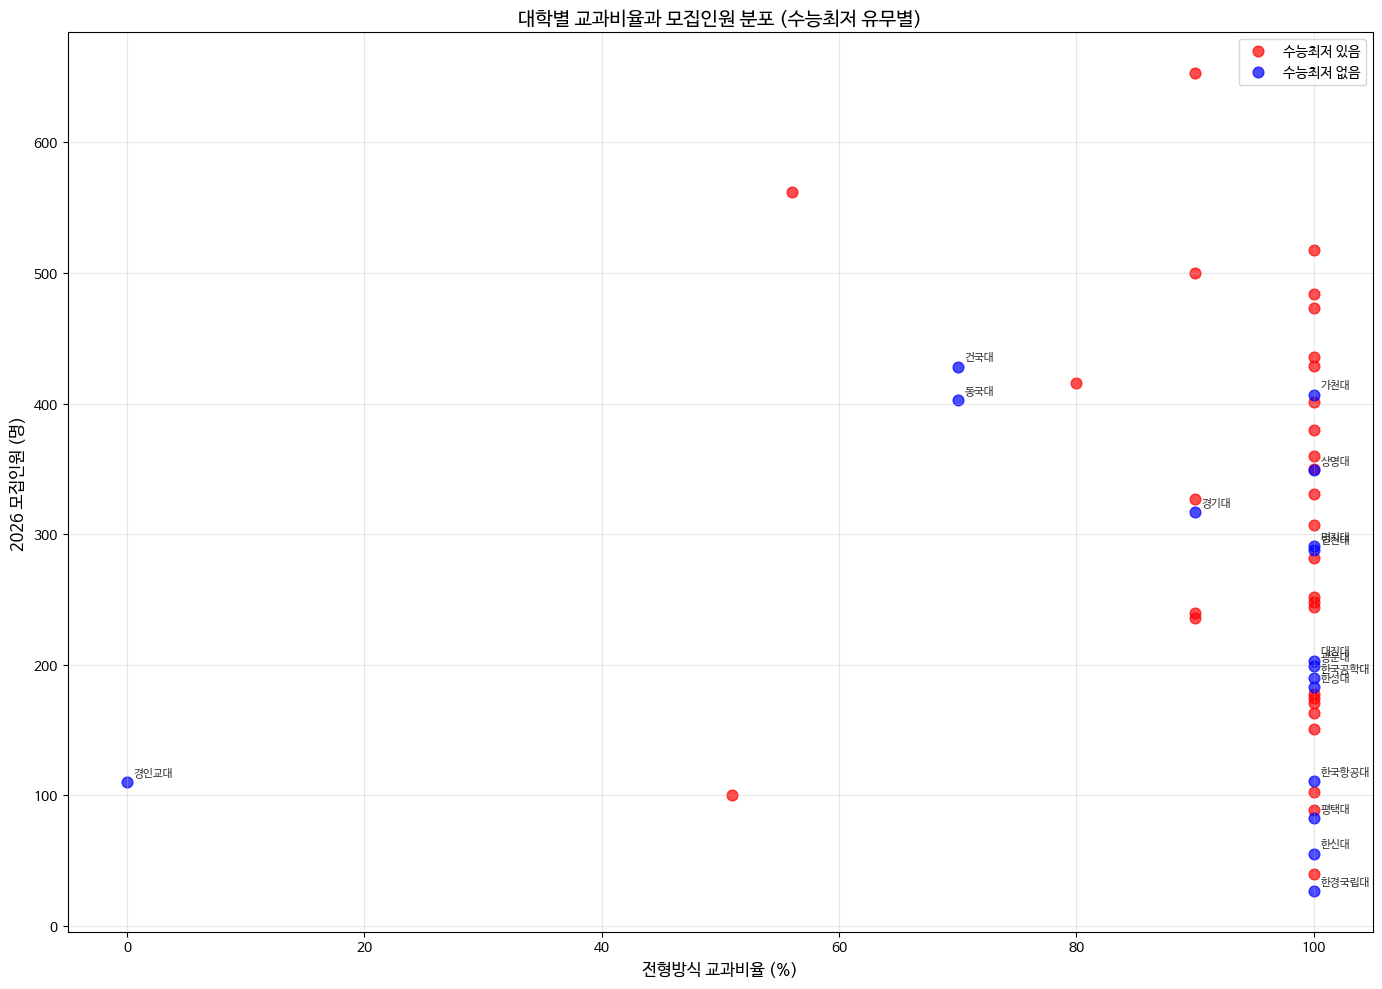

교과비율별 대학 분포:
            학교   교과비율  2026모집인원  수능최저유무
5         경인교대    0.0       110   False
26         수원대   51.0       100    True
6          경희대   56.0       562    True
3          건국대   70.0       428   False
13         동국대   70.0       403   False
23        성균관대   80.0       416    True
7          고려대   90.0       653    True
4          경기대   90.0       317   False
21       서울시립대   90.0       236    True
24        성신여대   90.0       240    True
44         한양대   90.0       327    True
35         중앙대   90.0       500    True
1         가톨릭대  100.0       282    True
8          광운대  100.0       199   False
10         단국대  100.0       252    True
9          국민대  100.0       401    True
15         명지대  100.0       291   False
14        동덕여대  100.0       244    True
12        덕성여대  100.0       175    True
11         대진대  100.0       203   False
19       서울과기대  100.0       473    True
18         서강대  100.0       178    True
16         삼육대  100.0       103    True
17         상명대  100.0      

In [ ]:
#4. 수도권 주요대 교과전형 산점도

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re



#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



# 데이터 입력
data = {
    '학교': ['가천대', '가톨릭대', '강남대', '건국대', '경기대', '경인교대', '경희대', '고려대', '광운대', '국민대',
             '단국대', '대진대', '덕성여대', '동국대', '동덕여대', '명지대', '삼육대', '상명대', '서강대', '서울과기대',
             '서울교대', '서울시립대', '서울여대', '성균관대', '성신여대', '세종대', '수원대', '숙명여대', '숭실대', '아주대',
             '연세대', '을지대', '이화여대', '인천대', '인하대', '중앙대', '차의과학대', '평택대', '한경국립대', '한국공학대',
             '한국외대', '한국항공대', '한성대', '한신대', '한양대', '한양대(ERICA)', '홍익대'],
    '전형명': ['지역균형', '지역균형', '지역균형', 'KU지역균형', '학교장추천', '학교장추천', '지역균형', '학교추천', '지역균형', '교과성적우수자',
               '지역균형선발', '학교장추천', '고교추천', '학교장추천인재', '학생부교과우수자', '학교장추천', '학교장추천', '고교추천', '지역균형', '고교추천',
               '학교장추천', '지역균형선발', '교과우수자', '학교장추천', '지역균형', '지역균형', '고교추천', '지역균형선발', '학생부우수자', '고교추천',
               '추천형', '지역균형', '고교추천', '지역균형', '지역균형', '지역균형', '지역균형선발', 'PTU추천', '지역균형선발', '지역균형',
               '학교장추천', '학교장추천', '지역균형', '학교장추천', '추천형', '지역균형선발', '학교장추천자'],
    '2026모집인원': [407, 282, 163, 428, 317, 110, 562, 653, 199, 401,
                  252, 203, 175, 403, 244, 291, 103, 349, 178, 473,
                  40, 236, 171, 416, 240, 350, 100, 248, 436, 331,
                  484, 151, 360, 288, 429, 500, 89, 83, 27, 190,
                  380, 111, 183, 55, 327, 518, 307],
    '전형방식': ['1단계(7배수): 교과100\n2단계: 1단계50 + 면접 50', '일반: 교과 100\n간호: 교과 100\n의예: 교과 100 + 인적성면접(합/불)',
                '교과 100', '교과 70 + 서류 30', '교과 90 + 출결 10', '', '교과 56 + 출결 7 + 봉사 7 + 서류 30', '교과 90 + 서류 10',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 100', '교과 70 + 서류 30', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '1단계(2배수): 교과 100\n2단계: 1단계 80 + 면접 20', '교과90 + 서류 10',
                '교과 100', '교과 80 + 서류 20', '교과 90 + 출결 10', '교과 100', '교과 51.7 + 면접 48.3', '교과 100', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 100', '교과90 + 출결 10', '교과 100', '교과 100', '교과 100', '교과 100',
                '교과 100', '교과 100', '교과 100', '교과 100', '교과 90 + 서류 10', '교과 100', '교과 100'],
    '수능최저': ['없음', '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5\n간호: 국,수,영,탐(1) 중 3개 합 7\n의예: 국,수,영,과(절사) 4개 합  5등급, 한 4',
                '주간: 국,수,영,탐(1) 중 1개 3\n야간: 없음', '없음', '없음', '없음', '국,수,영,탐 중 2개 합 5, 한 5\n의예, 한의예, 치의예, 약학: 국,수,영,탐 중 3개 합 4, 한 5',
                '국,수,영,탐(1) 중 3개 합 7, 한 4\n의대: 국,수,영,탐(1) 중 4개 합 5, 한 4', '없음', '인문: 국,수,영,탐(1) 중 2개 합 6\n자연: 국,수,영,과(1) 중 2개 합 6',
                '국,수,영,탐(1) 중 2개 합 6', '없음', '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5 (수 포함)', '없음',
                '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,과(1) 중 3개 합 5 (수 포함)', '없음', '국,수,영,탐/직(1) 중 2개 합 7\n간호, 물리치료: 국,수,영,탐/직(1) 중 2개 합 6\n약학: 국,수(미/기),영,과(1) 중 3개 합 5',
                '없음', '국,수,영,탐(1) 중 3개 각 3, 한 4', '국,수,영,탐/직(1) 중 2개 합 7\n간호, 물리치료: 국,수,영,탐/직(1) 중 2개 합 6\n약학: 국,수(미/기),영,과(1) 중 3개 합 5',
                '국,수,영,탐 4개 합 10, 한 4', '국,수,영,탐(1) 중 3개 합 8, 한 4', '국,수,영,탐(1) 중 2개 합 7',
                '인문,자연,글로벌융합: 국,수,영,탐1,탐2 중 3개 합 7등급\n자유,글로벌(리더,경제,경영,바이오),소프트웨어, 반도체,에너지: 국,수,영,탐1,탐2 중 3개 합 6등급\n제2외/한문으로 탐 1과목 대체 가능\n의예: 국,수,영,탐 중 3개 합 4등급 (수 포함)',
                '국,수,영,탐(1) 중 2개 합 7', '국,수,영,탐(1) 중 2개 합 6', '국,수,영,탐/직(1) 중 1개 4', '국,수,영,탐(1) 중 2개 합 6\n약학: 국,수,영,탐(1) 중 3개 합 5 (수 포함)',
                '자유전공, 인문: 국,수,영,탐(1) 2개 합 6\n자연: 국,수(미/기),영,과(1) 중 2개 합 6', '국,수,영,탐(1) 중 2개 합 5\n국,수,영,탐(2) 응시 필수\n의학: 국,수,영,탐 중 4개 합 6',
                '인문: 국,수,탐(1) 중 2개 합 4등급, 영 3, 한 4 (국/수 1개 포함)\n자연: 국,수(미/기),과(1) 중 2개 합 5등급, 영 3, 한 4 (수 포함)\n의예,치의예,약학: 국,수(미/기),과(1) 중 1등급 2개, 영3, 한4 (국/수 1개 포함)\n생활과학대,간호대: 인문 또는 자연 기준 중 하나 만족',
                '간호대: 국,수,영,탐(1) 중 2개 합 8\n보건과학대: 국,수,영,탐(1) 중 1개 4', '국,수,영,탐(1) 중 2개 합 5\n인문은 국, 자연은 수 응시 필수',
                '없음', '인문: 국,수,영,탐(1) 중 2개 합 6\n자연: 국,수,영,탐(1) 중 2개 합 5\n의예: 국,수,영,과(절사) 중 3개 합 4',
                '국,수,영,탐(1) 중 3개 합 7, 한 4\n약학: 국,수,영,탐(1) 중 4개 합 5, 한 4\n영 2등급은 1등급으로 인정', '약학: 국,수,영,탐(절사) 중 3개 합 6 (수 포함)',
                '없음', '없음', '없음', '글로벌: 국,수,영,탐(1) 중 1개 3, 한 4', '없음', '없음', '없음', '국,수,영,탐(1) 중 3개 합 7',
                '국,수,영,탐(1) 중 2개 합 7\n약학: 국,수,영,탐(1) 중 3개 합 5', '국,수,영,탐(1) 중 3개 합 8, 한 4']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 교과비율 추출 함수
def extract_교과_ratio(전형방식):
    if pd.isna(전형방식) or 전형방식 == '':
        return 0

    # "교과 XX" 패턴 찾기
    patterns = [
        r'교과\s*(\d+)',  # "교과 100", "교과100" 등
        r'교과\s*(\d+\.\d+)',  # "교과 51.7" 등
        r'1단계.*교과(\d+)',  # "1단계: 교과100" 등
        r'2단계.*1단계(\d+)'   # "2단계: 1단계80" 등 (1단계가 교과100%인 경우)
    ]

    for pattern in patterns:
        match = re.search(pattern, 전형방식)
        if match:
            ratio = float(match.group(1))
            # 2단계에서 1단계 비율이 나온 경우, 1단계가 교과100%라고 가정
            if '2단계' in 전형방식 and '1단계' in match.group(0):
                # 실제 교과 비율 계산 (1단계 교과100% * 2단계에서 1단계 비율)
                ratio = ratio
            return ratio

    return 0

# 수능최저 유무 판단 함수
def has_수능최저(수능최저):
    if pd.isna(수능최저) or 수능최저 == '' or 수능최저 == '없음':
        return False
    return True

# 교과비율과 수능최저 유무 계산
df['교과비율'] = df['전형방식'].apply(extract_교과_ratio)
df['수능최저유무'] = df['수능최저'].apply(has_수능최저)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# 수능최저 있는 경우와 없는 경우로 나누어 그리기
수능최저_있음 = df[df['수능최저유무'] == True]
수능최저_없음 = df[df['수능최저유무'] == False]

plt.scatter(수능최저_있음['교과비율'], 수능최저_있음['2026모집인원'],
           color='red', alpha=0.7, s=60, label='수능최저 있음')
plt.scatter(수능최저_없음['교과비율'], 수능최저_없음['2026모집인원'],
           color='blue', alpha=0.7, s=60, label='수능최저 없음')

plt.xlabel('전형방식 교과비율 (%)', fontsize=12)
plt.ylabel('2026 모집인원 (명)', fontsize=12)
plt.title('대학별 교과비율과 모집인원 분포 (수능최저 유무별)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# 수능최저 없는 대학들의 이름 표시
for idx, row in 수능최저_없음.iterrows():
    plt.annotate(row['학교'],
                (row['교과비율'], row['2026모집인원']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# 데이터 확인을 위한 출력
print("교과비율별 대학 분포:")
print(df[['학교', '교과비율', '2026모집인원', '수능최저유무']].sort_values('교과비율'))
print(f"\n수능최저 있음: {수능최저_있음.shape[0]}개 대학")
print(f"수능최저 없음: {수능최저_없음.shape[0]}개 대학")

print("\n수능최저 없는 대학 목록:")
print(수능최저_없음[['학교', '교과비율', '2026모집인원']].sort_values('교과비율'))

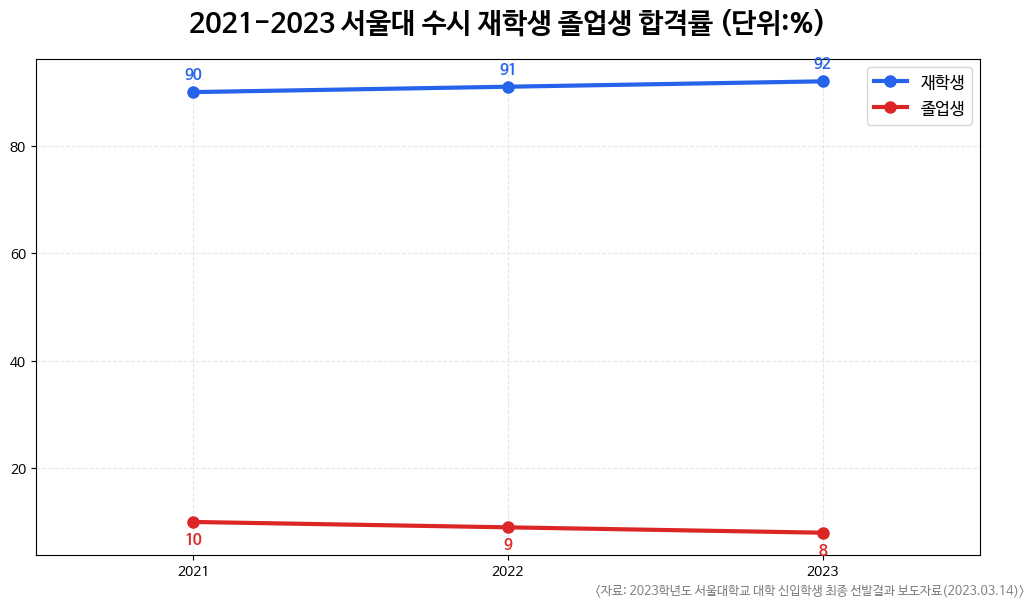

2021-2023 서울대학교 수시모집 합격률(단위:%)
재학생 합격률 변화: 90% → 92% (변화량: +2.0%p)
졸업생 합격률 변화: 10% → 8% (변화량: -2.0%p)
2023년 재학생/졸업생 비율 차이: 11.5배


In [ ]:
#5. 서울대 3개년 수시 재학생, 졸업생 합격률

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터
years = [2021, 2022, 2023]
재학생_비율 = [90, 91, 92]
졸업생_비율 = [10, 9, 8]

# 그래프 생성
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
line1 = plt.plot(years, 재학생_비율, 'o-', color='#2563eb', linewidth=3,
                markersize=8, label='재학생')
line2 = plt.plot(years, 졸업생_비율, 'o-', color='#dc2626', linewidth=3,
                markersize=8, label='졸업생')

# 데이터 포인트에 비율 표시
for i, (year, 재학생, 졸업생) in enumerate(zip(years, 재학생_비율, 졸업생_비율)):
    plt.annotate(f'{재학생}', (year, 재학생), textcoords="offset points",
                xytext=(0, 10), ha='center', fontsize=11, color='#2563eb', fontweight='bold')
    plt.annotate(f'{졸업생}', (year, 졸업생), textcoords="offset points",
                xytext=(0, -15), ha='center', fontsize=11, color='#dc2626', fontweight='bold')

# 그래프 설정
plt.title('2021-2023 서울대 수시 재학생 졸업생 합격률 (단위:%)',
          fontsize= 20, fontweight='bold', pad=20)
#plt.xlabel('연도', fontsize=12)
#plt.ylabel('합격률 (%)', fontsize=12)

# 축 설정
plt.xlim(2020.5, 2023.5)
plt.ylim(0, 100)
plt.xticks(years)
plt.grid(True, alpha=0.3, linestyle='--')

# 범례
plt.legend(fontsize=12, loc='upper right')

# 여백 조정
plt.tight_layout()

# 그래프에 캡션 추가
plt.figtext(0.6, 0.0, '<자료: 2023학년도 서울대학교 대학 신입학생 최종 선발결과 보도자료(2023.03.14)>',
           ha='left', fontsize=9, style='italic', color='gray')

# 그래프 표시
plt.show()

# 추가 분석 정보 출력
print("=" * 50)
print("2021-2023 서울대학교 수시모집 합격률(단위:%)")
print("=" * 50)
print(f"재학생 합격률 변화: {재학생_비율[0]}% → {재학생_비율[-1]}% (변화량: {재학생_비율[-1] - 재학생_비율[0]:+.1f}%p)")
print(f"졸업생 합격률 변화: {졸업생_비율[0]}% → {졸업생_비율[-1]}% (변화량: {졸업생_비율[-1] - 졸업생_비율[0]:+.1f}%p)")
print(f"2023년 재학생/졸업생 비율 차이: {재학생_비율[-1] / 졸업생_비율[-1]:.1f}배")

# 선택사항: 그래프를 파일로 저장
# plt.savefig('seoul_univ_admission_ratio.png', dpi=300, bbox_inches='tight')

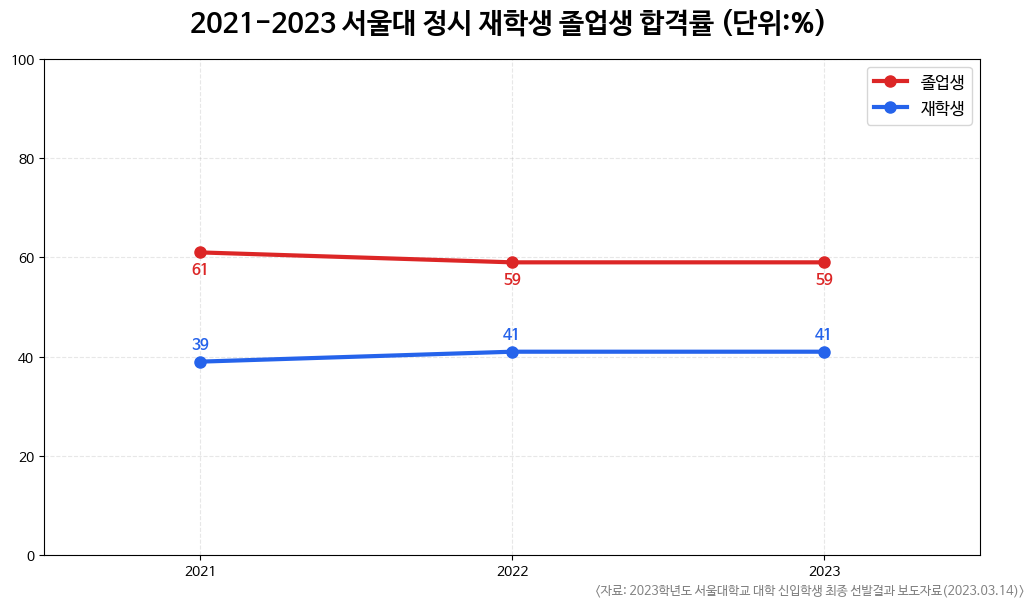

2021-2023 서울대학교 정시 합격률(단위:%)
재학생 합격률 변화: 39% → 41% (변화량: +2.0%p)
졸업생 합격률 변화: 61% → 59% (변화량: -2.0%p)
2023년 재학생/졸업생 비율 차이: 0.7배


In [ ]:
#6. 서울대 3개년 정시모집 재학생, 재수행 합격률

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터
years = [2021, 2022, 2023]
재학생_비율 = [39, 41, 41]
졸업생_비율 = [61, 59, 59]

# 그래프 생성
plt.figure(figsize=(10, 6))

# 선 그래프 그리기 (졸업생을 먼저 그려서 범례 순서 조정)
line2 = plt.plot(years, 졸업생_비율, 'o-', color='#dc2626', linewidth=3,
                markersize=8, label='졸업생')
line1 = plt.plot(years, 재학생_비율, 'o-', color='#2563eb', linewidth=3,
                markersize=8, label='재학생')

# 데이터 포인트에 비율 표시
for i, (year, 재학생, 졸업생) in enumerate(zip(years, 재학생_비율, 졸업생_비율)):
    plt.annotate(f'{재학생}', (year, 재학생), textcoords="offset points",
                xytext=(0, 10), ha='center', fontsize=11, color='#2563eb', fontweight='bold')
    plt.annotate(f'{졸업생}', (year, 졸업생), textcoords="offset points",
                xytext=(0, -15), ha='center', fontsize=11, color='#dc2626', fontweight='bold')

# 그래프 설정
plt.title('2021-2023 서울대 정시 재학생 졸업생 합격률 (단위:%) ',
          fontsize= 20, fontweight='bold', pad=20)
#plt.xlabel('연도', fontsize=12)
#plt.ylabel('합격률 (%)', fontsize=12)

# 축 설정
plt.xlim(2020.5, 2023.5)
plt.ylim(0, 100)
plt.xticks(years)
plt.grid(True, alpha=0.3, linestyle='--')

# 범례 (졸업생이 위, 재학생이 아래로 표시)
plt.legend(fontsize=12, loc='upper right')

# 여백 조정
plt.tight_layout()

# 그래프에 캡션 추가
plt.figtext(0.6, 0.0, '<자료: 2023학년도 서울대학교 대학 신입학생 최종 선발결과 보도자료(2023.03.14)>',
           ha='left', fontsize=9, style='italic', color='gray')

# 그래프 표시
plt.show()

# 추가 분석 정보 출력
print("=" * 50)
print("2021-2023 서울대학교 정시 합격률(단위:%)")
print("=" * 50)
print(f"재학생 합격률 변화: {재학생_비율[0]}% → {재학생_비율[-1]}% (변화량: {재학생_비율[-1] - 재학생_비율[0]:+.1f}%p)")
print(f"졸업생 합격률 변화: {졸업생_비율[0]}% → {졸업생_비율[-1]}% (변화량: {졸업생_비율[-1] - 졸업생_비율[0]:+.1f}%p)")
print(f"2023년 재학생/졸업생 비율 차이: {재학생_비율[-1] / 졸업생_비율[-1]:.1f}배")

# 선택사항: 그래프를 파일로 저장
# plt.savefig('seoul_univ_admission_ratio.png', dpi=300, bbox_inches='tight')

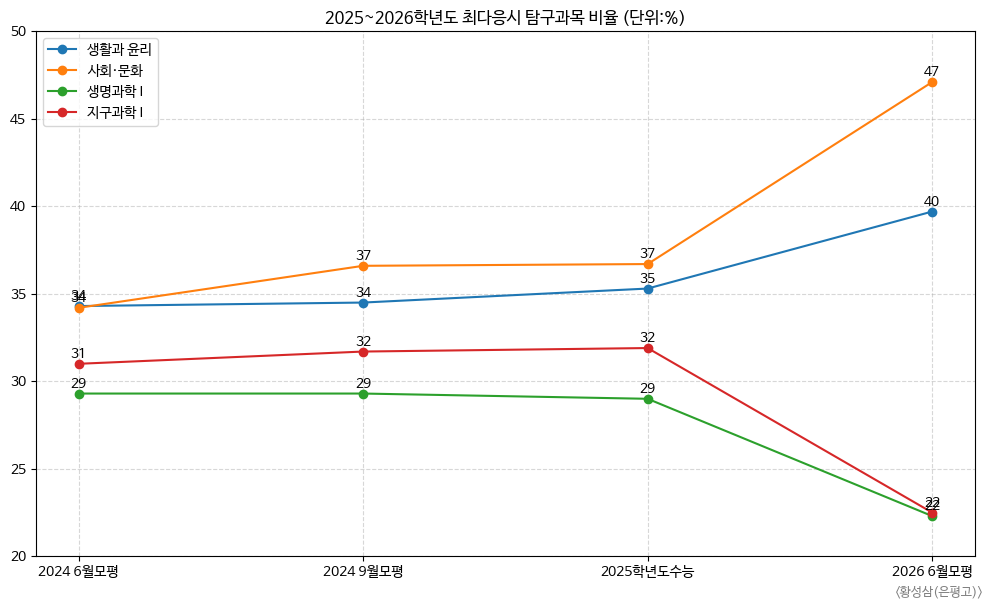

In [ ]:
#7. 사탐런 2개년 모의고사 상황

import matplotlib.pyplot as plt

# 과목별 비율 데이터 정리
labels = ["2024 6월모평", "2024 9월모평", "2025학년도수능", "2026 6월모평"]
subjects = {
    "생활과 윤리": [34.3, 34.5, 35.3, 39.7],
    "사회·문화": [34.2, 36.6, 36.7, 47.1],
    "생명과학 I": [29.3, 29.3, 29.0, 22.3],
    "지구과학 I": [31.0, 31.7, 31.9, 22.5]
}

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 과목별로 선 그래프 생성
for subject, values in subjects.items():
    plt.plot(labels, values, marker='o', label=subject)

    # 각 점에 수치 표시
    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f"{round(v)}", ha='center', va='bottom')

# 그래프 제목 및 축 설정
plt.title("2025~2026학년도 최다응시 탐구과목 비율 (단위:%)")
#plt.xlabel("평가 시점")
#plt.ylabel("응시 비율 (%)")
plt.ylim(20, 50)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()


# 그래프에 캡션 추가
plt.figtext(0.9, 0.0, '<황성삼(은평고)>', ha='left', fontsize=9, style='italic', color='gray')

# 그래프 출력
plt.show()

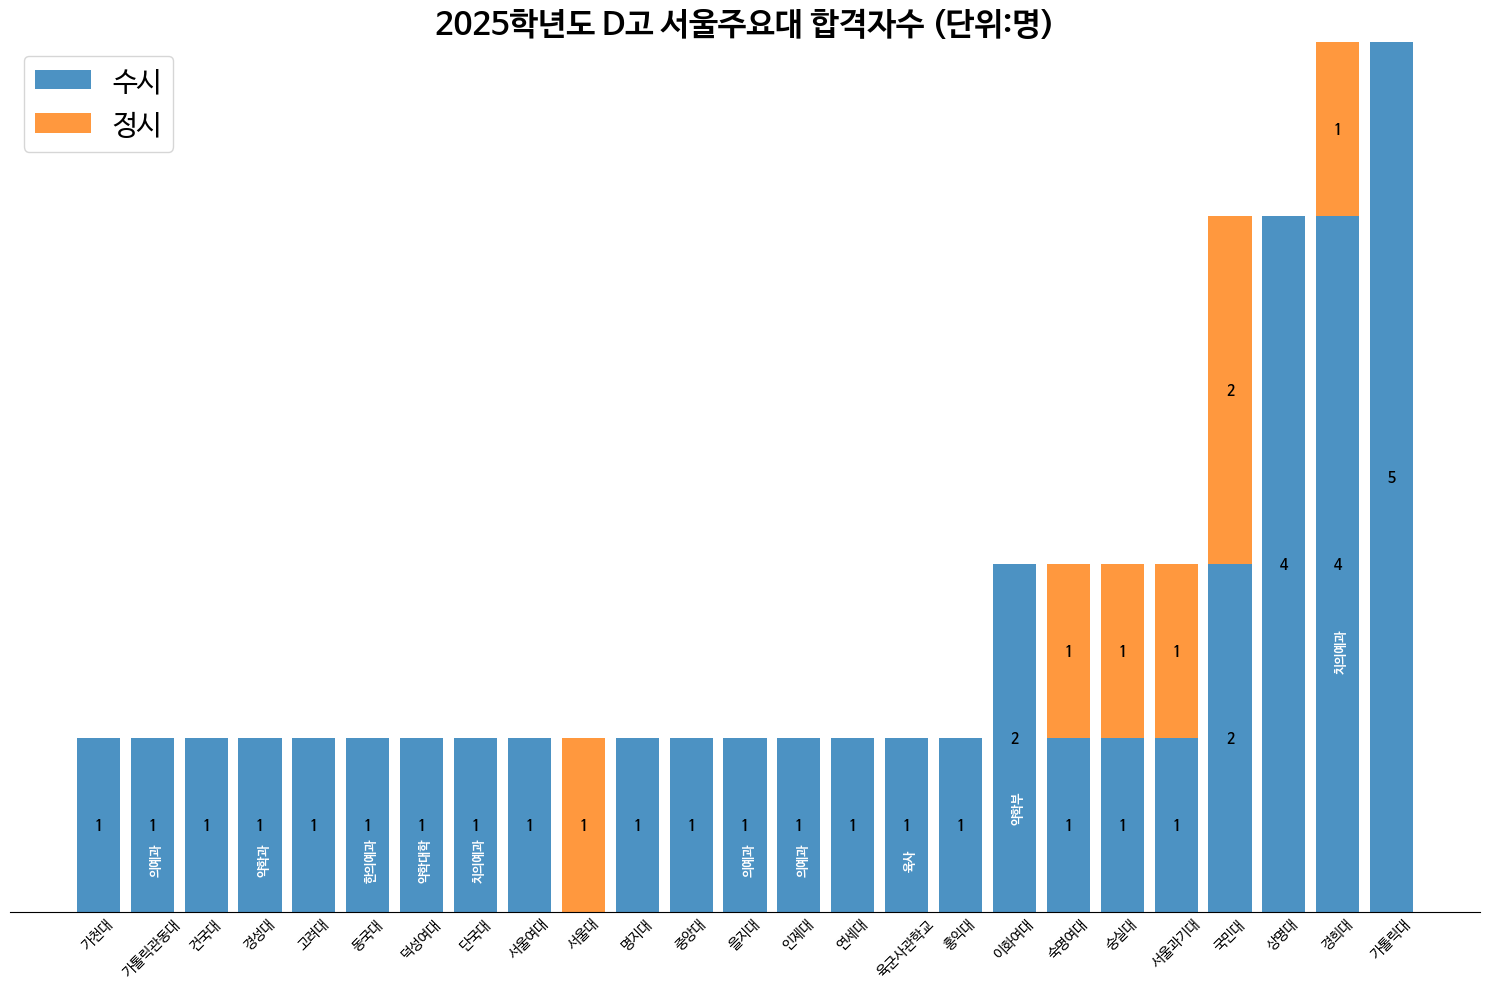


=== 대학별 합격자 수 (수시/정시 구분) ===
가톨릭대: 총 5명 (수시 5명, 정시 0명)
경희대: 총 5명 (수시 4명, 정시 1명)
상명대: 총 4명 (수시 4명, 정시 0명)
국민대: 총 4명 (수시 2명, 정시 2명)
이화여대: 총 2명 (수시 2명, 정시 0명)
서울과기대: 총 2명 (수시 1명, 정시 1명)
숭실대: 총 2명 (수시 1명, 정시 1명)
숙명여대: 총 2명 (수시 1명, 정시 1명)
가천대: 총 1명 (수시 1명, 정시 0명)
서울여대: 총 1명 (수시 1명, 정시 0명)
단국대: 총 1명 (수시 1명, 정시 0명)
덕성여대: 총 1명 (수시 1명, 정시 0명)
동국대: 총 1명 (수시 1명, 정시 0명)
고려대: 총 1명 (수시 1명, 정시 0명)
경성대: 총 1명 (수시 1명, 정시 0명)
건국대: 총 1명 (수시 1명, 정시 0명)
가톨릭관동대: 총 1명 (수시 1명, 정시 0명)
홍익대: 총 1명 (수시 1명, 정시 0명)
육군사관학교: 총 1명 (수시 1명, 정시 0명)
연세대: 총 1명 (수시 1명, 정시 0명)
인제대: 총 1명 (수시 1명, 정시 0명)
을지대: 총 1명 (수시 1명, 정시 0명)
중앙대: 총 1명 (수시 1명, 정시 0명)
명지대: 총 1명 (수시 1명, 정시 0명)
서울대: 총 1명 (수시 0명, 정시 1명)


In [4]:
#8. 2025학년도 등촌고 합격자 그래프

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 새로운 데이터 생성
data = [
    ['연세대학교', '첨단컴퓨팅학부', '수시'],
    ['고려대학교', '컴퓨터학과', '수시'],
    ['경희대학교', '치의예과', '수시'],
    ['단국대학교', '천안캠퍼스 치의예과', '수시'],
    ['경희대학교', '치의예과', '수시'],
    ['동국대학교', '경주캠퍼스 한의예과', '수시'],
    ['을지대학교', '의예과', '수시'],
    ['이화여자대학교', '약학부', '수시'],
    ['가톨릭관동대학교', '의예과', '수시'],
    ['덕성여자대학교', '약학대학', '수시'],
    ['인제대학교', '의예과', '수시'],
    ['경성대학교', '약학과', '수시'],
    ['중앙대학교', '간호학과', '수시'],
    ['건국대학교', '글로컬캠퍼스 간호학과', '수시'],
    ['경희대학교', '간호학과', '수시'],
    ['국민대학교', '전자공학부 지능형ICT융합전공', '수시'],
    ['숭실대학교', '전자정보공학부(IT융합)', '수시'],
    ['이화여자대학교', '인공지능데이터사이언스학부', '수시'],
    ['숙명여자대학교', '법학부', '수시'],
    ['국민대학교', '사회학과', '수시'],
    ['홍익대학교', '자율전공', '수시'],
    ['국민대학교', 'AI빅데이터융합경영학과(인문)', '정시'],
    ['서울과학기술대학교', '자유전공학부(공과대학)', '정시'],
    ['서울과학기술대학교', '기계시스템디자인공학과', '수시'],
    ['가톨릭대학교', '수학과', '수시'],
    ['상명대학교', '교육학과', '수시'],
    ['숙명여자대학교', '첨단공학부', '정시'],
    ['가톨릭대학교', '영어영문학과', '수시'],
    ['상명대학교', '핀테크빅데이터융합스마트생산전공', '수시'],
    ['성신여자대학교', '자유전공', '수시'],
    ['서울대학교', '인문계열', '정시'],
    ['국민대학교', '나노전자물리학과', '정시'],
    ['육군사관학교', '', '수시'],
    ['가톨릭대학교', '공간디자인.소비자학과', '수시'],
    ['가톨릭대학교', '행정학과', '수시'],
    ['상명대학교', '자유전공(인문사회계열)', '수시'],
    ['가톨릭대학교', '심리학과', '수시'],
    ['명지대학교', '영어영문학전공', '수시'],
    ['서울여자대학교', '영어영문학과', '수시'],
    ['경희대학교', '식품영양학과', '수시'],
    ['상명대학교', '공간환경학부', '수시'],
    ['한국예술종합학교', '연기전공', '수시'],
    ['가천대학교', '식품영양학과', '수시'],
    ['경희대학교', '일본어학과', '정시'],
    ['숭실대학교', '자율전공학과', '정시']
]

# DataFrame 생성
df = pd.DataFrame(data, columns=['대학', '학과', '전형분류'])

# 전형분류가 비어있는 경우 '수시'로 처리
df['전형분류'] = df['전형분류'].fillna('수시')
df['전형분류'] = df['전형분류'].replace('', '수시')

# 대학명 단축 (가독성을 위해)
university_mapping = {
    '연세대학교': '연세대',
    '고려대학교': '고려대',
    '경희대학교': '경희대',
    '단국대학교': '단국대',
    '동국대학교': '동국대',
    '을지대학교': '을지대',
    '이화여자대학교': '이화여대',
    '가톨릭관동대학교': '가톨릭관동대',
    '덕성여자대학교': '덕성여대',
    '인제대학교': '인제대',
    '경성대학교': '경성대',
    '중앙대학교': '중앙대',
    '건국대학교': '건국대',
    '성신여대': '성신여대',
    '인하대학교': '인하대',
    '국민대학교': '국민대',
    '숭실대학교': '숭실대',
    '숙명여자대학교': '숙명여대',
    '경기대학교': '경기대',
    '홍익대학교': '홍익대',
    '서울과학기술대학교': '서울과기대',
    '가톨릭대학교': '가톨릭대',
    '상명대학교': '상명대',
    '서울대학교': '서울대',
    '육군사관학교': '육군사관학교',
    '서울여자대학교': '서울여대',
    '동덕여자대학교': '동덕여대',
    '강원대학교': '강원대',
    '명지대학교': '명지대',
    '삼육대학교': '삼육대',
    '충북대학교': '충북대',
    '인천대학교': '인천대',
    '한성대학교': '한성대',
    '가천대학교': '가천대',
    '건국대학교(글로컬)': '건국대(글로컬)',
    '성결대학교': '성결대',
    '한국체육대학교': '한국체육대',
    '동양미래대학교': '동양미래대',
    '명지전문대학교': '명지전문대',
    '서울신학대학교': '서울신학대',
    '한양여자대학교': '한양여대',
    '한세대학교': '한세대',
    '신한대학교': '신한대',
    '중앙대학교(다빈치)': '중앙대(다빈치)',
    '수원대학교': '수원대'
}

# 대학명 매핑 적용
df['대학_단축'] = df['대학'].map(university_mapping)

# 대학별 수시/정시 합격자 수 계산
pivot_table = df.groupby(['대학_단축', '전형분류']).size().unstack(fill_value=0)

# 총 합격자 수 기준으로 정렬
pivot_table['총합'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('총합', ascending=True)

# 수시, 정시 데이터 분리
num_su = pivot_table.get('수시', []).values
num_je = pivot_table.get('정시', []).values

# 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))

# 막대 그래프 생성 (누적)
#bars1 = ax.bar(range(len(pivot_table)), num_su, label='수시', color='steelblue', alpha=0.8)
#bars2 = ax.bar(range(len(pivot_table)), num_je, bottom=num_su, label='정시', color='lightcoral', alpha=0.8)


bars1 = ax.bar(range(len(pivot_table)), num_su, label='수시', alpha=0.8)
bars2 = ax.bar(range(len(pivot_table)), num_je, bottom=num_su, label='정시', alpha=0.8)

# 막대 위에 값 표시
for i, (su, je) in enumerate(zip(num_su, num_je)):
    if su >= 1:
        ax.text(i, su/2, str(su), ha='center', va='center', fontsize=10, fontweight='bold')
    if je >= 1:
        ax.text(i, su + je/2, str(je), ha='center', va='center', fontsize=10, fontweight='bold')

# 특별 표시 (의대, 치대, 한의대, 약대 등)
special_labels = {
    '경희대': '치의예과',
    '단국대': '치의예과',
    '동국대': '한의예과',
    '을지대': '의예과',
    '이화여대': '약학부',
    '가톨릭관동대': '의예과',
    '덕성여대': '약학대학',
    '인제대': '의예과',
    '경성대': '약학과',
    '육군사관학교': '육사'
}

# 특별 라벨 추가
for i, uni in enumerate(pivot_table.index):
    if uni in special_labels:
        total_height = num_su[i] + num_je[i]
        ax.text(i+0.08, total_height * 0.3, special_labels[uni], ha='center', va='center',
                fontsize=9, color='white', fontweight='bold', rotation= 90)

# 그래프 설정
ax.set_title('2025학년도 D고 서울주요대 합격자수 (단위:명)', fontsize= 23, fontweight='bold', loc='center')
#ax.text(0.9, 1.02, '(단위: 명)', ha='center', va='bottom', transform=ax.transAxes, fontsize= 18)

# 범례 설정
ax.legend(loc='upper left', fontsize = 20)

# x축 설정
ax.set_xticks(range(len(pivot_table)))
ax.set_xticklabels(pivot_table.index, rotation= 45)
ax.tick_params(axis='x', which='both', length=0)

# y축 제거
ax.set_yticks([])

# 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 합격자 수 요약 출력
print("\n=== 대학별 합격자 수 (수시/정시 구분) ===")
for uni in pivot_table.sort_values('총합', ascending=False).index:
    su_count = pivot_table.loc[uni, '수시'] if '수시' in pivot_table.columns else 0
    je_count = pivot_table.loc[uni, '정시'] if '정시' in pivot_table.columns else 0
    total = su_count + je_count
    print(f"{uni}: 총 {total}명 (수시 {su_count}명, 정시 {je_count}명)")